## load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
df = pd.concat([pd.read_csv("./data/crawled/pre_terror.tsv", quoting=3, sep="\t"), pd.read_csv("./data/crawled/post_london.tsv", quoting=3, sep="\t")])

In [3]:
df = df.drop_duplicates(subset="text")

In [4]:
df.describe(include="all")

,tweet_id,text,publish_date,user_gender,has_url,target_hashtag
count,5.267370e+05,526737,526737,526737,526737,0.0
unique,NaN,526737,142705,3,1,NaN
top,NaN,True faith always produces real conformity to ...,2017-04-11 19:07:47,UNKNOWN,False,NaN
freq,NaN,1,59,287166,526737,NaN
mean,8.453130e+17,NaN,NaN,NaN,NaN,NaN
std,6.297338e+15,NaN,NaN,NaN,NaN,NaN
min,3.675806e+17,NaN,NaN,NaN,NaN,NaN
25%,8.401975e+17,NaN,NaN,NaN,NaN,NaN
50%,8.455393e+17,NaN,NaN,NaN,NaN,NaN
75%,8.507746e+17,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[df["text"].str.len() > 15]

In [6]:
len(df)

510399

In [7]:
df["publish_date"] = pd.to_datetime(df['publish_date'].astype(str), format='%Y-%m-%d')

In [8]:
df.index = df["publish_date"]
df.resample("D").count()

,tweet_id,text,publish_date,user_gender,has_url,target_hashtag
publish_date,,,,,,
2017-02-22,9281,9281,9281,9281,9281,0
2017-02-23,9046,9046,9046,9046,9046,0
2017-02-24,8499,8499,8499,8499,8499,0
2017-02-25,10161,10161,10161,10161,10161,0
2017-02-26,8126,8126,8126,8126,8126,0
2017-02-27,7390,7390,7390,7390,7390,0
2017-02-28,8230,8230,8230,8230,8230,0
2017-03-01,7911,7911,7911,7911,7911,0
2017-03-02,7139,7139,7139,7139,7139,0


## load model

In [9]:
import numpy as np

In [10]:
%ls ../*.txt

../glove.twitter.27B.100d.txt  ../glove.twitter.27B.25d.txt
../glove.twitter.27B.200d.txt  ../glove.twitter.27B.50d.txt


In [11]:
glove = {}
f = open("../glove.twitter.27B.200d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove[word] = coefs
f.close()

print('Found %s word vectors.' % len(glove))

Found 1193514 word vectors.


In [13]:
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [14]:
K.clear_session()
hybrid_model = load_model("./logs/pretrain_2/hybrid/weights.12.hdf5")
word_model = load_model("./logs/pretrain_2/word/weights.10.hdf5")

## preprocess

In [15]:
import data.preprocess as p
from tqdm import tqdm_notebook as tqdm
import pickle
import numpy as np
from data.char import text_to_1hot_matrix
import random
import datetime

In [16]:
embedding_matrix = np.load("./data/word_outputs/glove_embedding.npy")

In [17]:
with open("./data/word_outputs/vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

In [18]:
max_len = 40
count = 0
def tokens2vectors(tokens):
    m = np.zeros((max_len, 200))
    for i, t in enumerate(tokens[:max_len]):
        if t not in vocab["word2id"].keys():
            if t in glove:
                m[i] = glove[t]
        else:
            m[i] = embedding_matrix[vocab["word2id"][t]]
    return m


In [19]:
def get_predictions(_df):
    tweets = _df.text.tolist()
    _tweets = [p.preprocess_tweet(t) for t in tweets]
    print("preprocessed tweets")
    _tweets = [t.split("\t") for t in _tweets]
    tweets_word = np.array(list(map(tokens2vectors, _tweets)))
    print(tweets_word.shape)
    tweets_char = np.array([text_to_1hot_matrix(row) for row in tweets])
    
    hybrid_preds = np.argmax(hybrid_model.predict([tweets_char, tweets_word], batch_size=128), axis=1)
    word_preds = np.argmax(word_model.predict(tweets_word, batch_size=128), axis=1)
    return hybrid_preds, word_preds

In [64]:
def draw_graph(_df, save=False, splitted=True):
    date = []
    hybrid = []
    word = []
    agree = []
    if not splitted:
        splitted_df = []
        for group_name, df_group in _df.groupby(pd.TimeGrouper("D")):
            if group_name.year == 2017 and group_name.month > 1:
                df_group = df_group.sample(n=5000)
                hybrid_preds, word_preds = get_predictions(df_group)
                splitted_df.append({"date": group_name, 
                                           "hybrid_preds": hybrid_preds,
                                           "word_preds": word_preds,
                                            "df": df_group})
    else:
        splitted_df = _df
        
    
    for timeframe in splitted_df:
        date.append(timeframe["date"])

        total = len(timeframe["hybrid_preds"])

        hybrid.append(np.count_nonzero(timeframe["hybrid_preds"])/total)
        word.append(np.count_nonzero(timeframe["word_preds"])/total)

        agree_count = 0
        for i in range(len(timeframe["hybrid_preds"])):
            if (timeframe["hybrid_preds"][i] == timeframe["word_preds"][i] 
                and timeframe["hybrid_preds"][i] == 1):
                agree_count += 1
        agree.append(agree_count/total)
    
    plt.axvline(datetime.date(2017, 3, 22), color='r', 
                linewidth=3, linestyle="dotted", alpha=0.8,
                   label="Westminster Terror")
    
    #plt.axvline(datetime.date(2017, 5, 28), color='m', 
    #            linewidth=3, linestyle="dotted", alpha=0.8,
    #               label="Manchester Arena terror")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.plot(date, agree)
    plt.gcf().autofmt_xdate()
    
    plt.title('among 295,000 tweets from United Kingdom randomly sampled', 
               fontsize=12)
    plt.suptitle('Tweets classified as Abusive Language', 
               fontsize=14, fontweight='bold')
    plt.xlabel('date (calculated daily)', fontweight='bold')
    plt.ylabel('percentage', fontweight='bold')
    plt.legend()
    
    plt.gcf().set_size_inches(10, 6)    
    if save:
        plt.savefig("uk_tweets_graph.png", dpi=300)
    else:
        plt.show()
    return splitted_df

preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 40, 200)
preprocessed tweets
(5000, 4

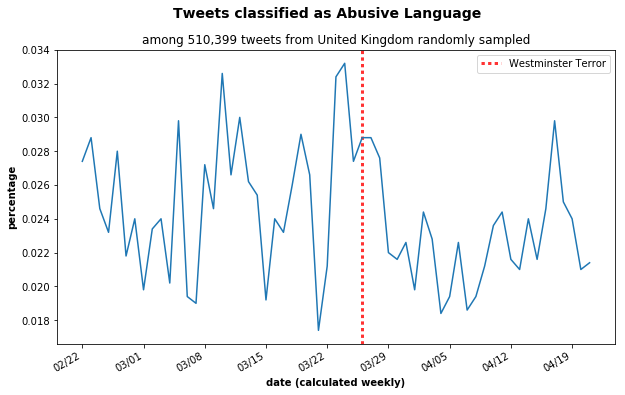

In [27]:
splitted_df = draw_graph(df, False, splitted=False)

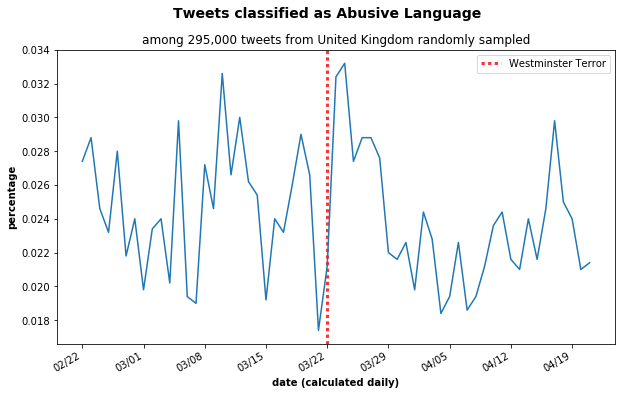

In [65]:
splitted_df = draw_graph(splitted_df, False, splitted=True)

In [49]:
true_preds = []
false_preds = []
for timeframe in splitted_df:
    if timeframe["date"].month == 3 and timeframe["date"].day >= 17 and timeframe["date"].day <= 21:
        tweets = timeframe["df"].text.tolist()
        assert len(tweets) == len(timeframe["hybrid_preds"])
        for i in range(len(timeframe["hybrid_preds"])):
            if timeframe["hybrid_preds"][i] == 1:
                true_preds.append(tweets[i])
            else:
                false_preds.append(tweets[i])
len(true_preds), len(false_preds)

(805, 24195)

In [61]:
len(splitted_df)

59

## co-occuring words

In [50]:
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

In [51]:
stopWords = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)
tknzr = TweetTokenizer(reduce_len=True, preserve_case=False, strip_handles=False)

In [52]:
total_words = Counter()
true_words = Counter()

In [53]:
for tokens in [tknzr.tokenize(t.translate(translator)) for t in true_preds]:
    words = list(filter(lambda x: x not in stopWords, tokens))
    total_words.update(words)
    true_words.update(words)
for tokens in [tknzr.tokenize(t.translate(translator)) for t in false_preds]:
    total_words.update(list(filter(lambda x: x not in stopWords, tokens)))

In [54]:
len(total_words), len(true_words)

(48343, 3907)

In [55]:
total_words.most_common(250)

[('😂', 1121),
 ('im', 1092),
 ('like', 909),
 ('get', 891),
 ('one', 878),
 ('good', 768),
 ('dont', 744),
 ('day', 741),
 ('1', 671),
 ('time', 662),
 ('love', 623),
 ('2', 615),
 ('today', 597),
 ('vs', 581),
 ('new', 577),
 ('people', 551),
 ('️', 547),
 ('go', 538),
 ('soccer', 533),
 ('livescore', 527),
 ('see', 517),
 ('back', 510),
 ('know', 505),
 ('think', 497),
 ('well', 483),
 ('cant', 483),
 ('nowplaying', 468),
 ('thanks', 462),
 ('great', 452),
 ('£', 448),
 ('would', 446),
 ('us', 432),
 ('happy', 431),
 ('need', 429),
 ('want', 423),
 ('got', 419),
 ('’', 414),
 ('much', 411),
 ('3', 405),
 ('still', 401),
 ('goal', 399),
 ('man', 388),
 ('going', 380),
 ('last', 374),
 ('first', 359),
 ('u', 357),
 ('work', 354),
 ('really', 351),
 ('eghradio', 351),
 ('thats', 342),
 ('best', 341),
 ('listen', 339),
 ('x', 338),
 ('never', 334),
 ('week', 333),
 ('❤', 331),
 ('make', 330),
 ('thank', 329),
 ('could', 328),
 ('night', 328),
 ('10', 325),
 ('ive', 322),
 ('life', 314),


In [56]:
true_words.most_common(250)

[('😂', 100),
 ('like', 57),
 ('im', 45),
 ('get', 44),
 ('fucking', 43),
 ('fuck', 41),
 ('dont', 38),
 ('bitch', 38),
 ('u', 37),
 ('shit', 33),
 ('cunt', 29),
 ('man', 27),
 ('know', 25),
 ('ass', 23),
 ('want', 23),
 ('right', 23),
 ('gay', 23),
 ('people', 21),
 ('thats', 21),
 ('one', 21),
 ('dick', 20),
 ('lol', 19),
 ('see', 19),
 ('cant', 19),
 ('little', 19),
 ('😭', 18),
 ('think', 17),
 ('\U0001f3fb', 17),
 ('men', 16),
 ('look', 16),
 ('girl', 16),
 ('go', 16),
 ('1', 15),
 ('women', 15),
 ('much', 14),
 ('say', 14),
 ('good', 14),
 ('ive', 14),
 ('got', 14),
 ('even', 14),
 ('woman', 13),
 ('never', 13),
 ('face', 13),
 ('said', 13),
 ('cunts', 13),
 ('youre', 12),
 ('fat', 12),
 ('hate', 12),
 ('fist', 12),
 ('many', 12),
 ('life', 12),
 ('going', 11),
 ('\U0001f3fc', 11),
 ('take', 11),
 ('someone', 11),
 ('back', 11),
 ('iron', 11),
 ('really', 11),
 ('hes', 11),
 ('head', 11),
 ('us', 11),
 ('love', 11),
 ('2', 10),
 ('shes', 10),
 ('night', 10),
 ('last', 10),
 ('actua

In [59]:
s = ""
for word, count in total_words.most_common(200):
    for _ in range(int(count/10)):
        s += ("%s " % word)
s

'😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 😂 im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im im like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like like lik